In [ ]:
#1. Get data/indicators
#2. Define Strategy
#3. Test Strategy


# Moving Average

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



Price,Adj Close,Close,High,Low,Open,Volume,MA,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,,
1993-02-26,24.640539,44.406250,44.437500,44.187500,44.437500,66200,44.273438,NaN,NaN,NaN
1993-03-01,24.571190,44.281250,44.562500,44.218750,44.562500,66500,44.290625,1.0,-0.002815,-0.002815
1993-03-02,24.935333,44.937500,44.937500,44.250000,44.312500,182400,44.325000,-1.0,0.011963,-0.017593
1993-03-03,25.039362,45.125000,45.156250,44.937500,45.000000,280100,44.364063,1.0,0.016186,-0.013494
1993-03-04,24.900648,44.875000,45.187500,44.875000,45.187500,89500,44.367188,1.0,0.010556,-0.018960
...,...,...,...,...,...,...,...,...,...,...
2025-06-24,606.780029,606.780029,607.849976,603.409973,604.330017,67735300,596.948508,1.0,12.664293,-0.775186
2025-06-25,607.119995,607.119995,608.609985,605.539978,607.909973,62114800,597.747006,1.0,12.671949,-0.775060
2025-06-26,611.869995,611.869995,612.309998,608.369995,608.989990,78548400,598.954007,1.0,12.778916,-0.773300


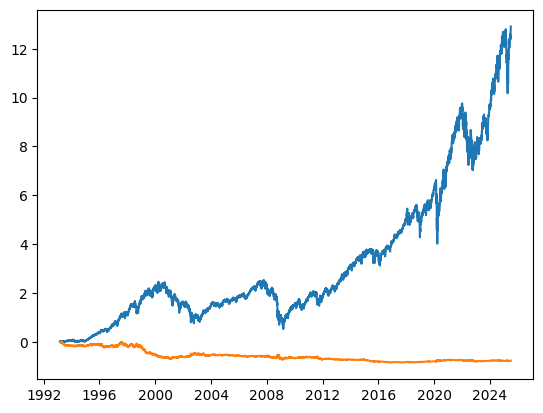

In [ ]:
#MOVING AVERAGES
TICKER = 'SPY'
WINDOW = 20

def get_data():
    df = yf.download(
    TICKER,
    start='1993-01-29',
    end='2025-07-01',
    interval='1d',
    auto_adjust=False,
    progress=False,
    threads=False)
    
    df['MA'] = df['Close'].rolling(WINDOW).mean()
    
    return df.dropna()


def add_strategy(df):
    df.columns = df.columns.get_level_values(0)
    


    df['Strategy'] = np.where(df['Close'] > df['MA'],1,-1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df



def test_strategy(df):
    df['asset_cumulative'] =  np.cumprod(1 + df['Close'].pct_change()) - 1
    df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy']) - 1

    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])
    plt.legend([f'{TICKER} Cumulative Returns', f'{WINDOW} Moving Average Cumulative Returns'])


    return df


def main():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df



main()
#graph shows someone who buys and hold S&P vs. somone who follows 20 day moving average